We consider a system of the form

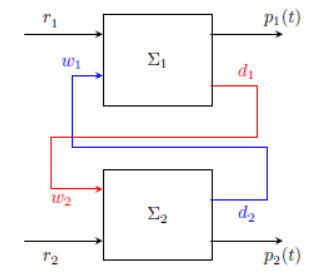

- $\Sigma_1$ has inputs $r_1$ and $d_2$ and outputs $p_1$ and $d_1$.
- $\Sigma_2$ has inputs $r_2$ and $d_1$ and outputs $p_2$ and $d_2$.

We investigate the steady-state behavior of the outputs $p_i$. By forcing the outputs to be within a certain range, we can get constraints on the $d_i$ and $r_i$. It turns out the $d_i$ and $r_i$ are also coupled according to

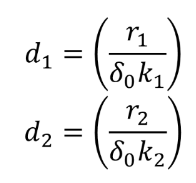

This relationship enables us to write specifications only on the $d_i$. From Ilaria and Carlos's analysis, we are guaranteed to meet the $p_i$ steady-state values under the following constraints (for a 3-subsystem component).

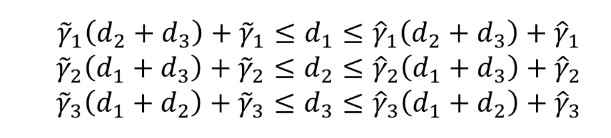

Carlos provided the following values:

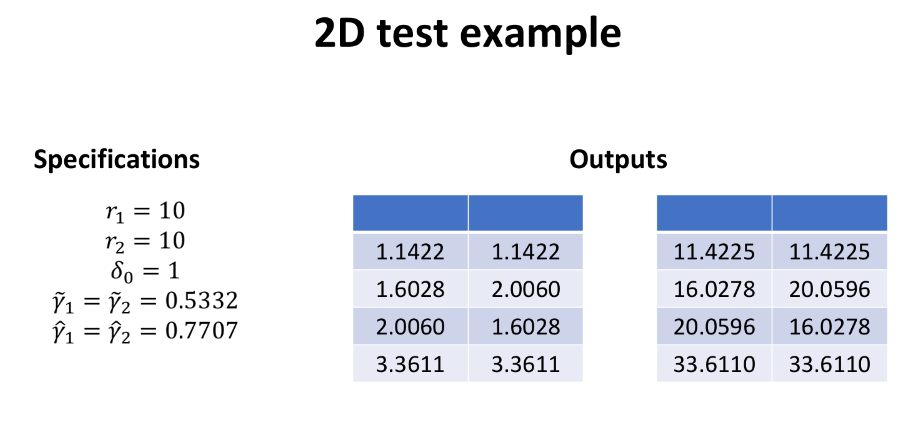

We can implement this in Pacti:

InVars: []
OutVars:[d_1, d_2]
A: [
  
]
G: [
  d_1 - 0.6161 d_2 <= 0.6160999999999999
  -d_1 + 0.4533 d_2 <= -0.45330000000000004
  -0.204 d_1 + d_2 <= 0.20399999999999996
  0.1609 d_1 - d_2 <= -0.16090000000000004
]


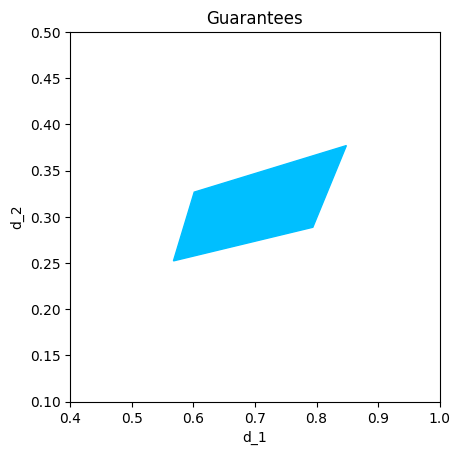

In [7]:
from pacti.iocontract import Var
from pacti.terms.polyhedra import PolyhedralContract, plots


r1 = 9
r2 = 1
delta0 = 0.0693
gamma_tilde_1 = 0.4533
gamma_tilde_2 = 0.1609
gamma_hat_1 = 0.6161
gamma_hat_2 = 0.2040

sigma1 = PolyhedralContract.from_string(
    input_vars=["d_2"],
    output_vars=["d_1"],
    assumptions=[],
    guarantees=[
        f"d_1 - {gamma_hat_1} d_2 <= {gamma_hat_1}",
        f"-d_1 + {gamma_tilde_1} d_2 <= -{gamma_tilde_1}",
        ]
    )

sigma2 = PolyhedralContract.from_string(
    input_vars=["d_1"],
    output_vars=["d_2"],
    assumptions=[],
    guarantees=[
        f"d_2 - {gamma_hat_2} d_1 <= {gamma_hat_2}",
        f"-d_2 + {gamma_tilde_2} d_1 <= -{gamma_tilde_2}",
        ]
    )


system = sigma1.compose(sigma2, vars_to_keep=["d_1", "d_2"])
print(system)

fig = plots.plot_guarantees(system, x_var=Var("d_1"), y_var=Var("d_2"), x_lims=(0.4,1), y_lims=(0.1,0.5), var_values={})

Now we plot this in parameter space.
Using the relation between the $r_i$ and the $k_i$, we have

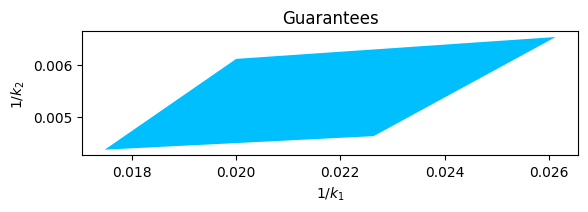

In [18]:
# x_transform = lambda d1,d2: (r1/delta0) * (1/d1)
# y_transform = lambda d1,d2: (r2/delta0) * (1/d2)

x_transform = lambda d1,d2: (delta0*d2/r2)
y_transform = lambda d1,d2: (delta0*d1/r1)

fig = plots.plot_guarantees(
    system,
    x_var=Var("d_1"),
    y_var=Var("d_2"),
    x_lims=(0,1),
    y_lims=(0,1),
    new_x_var="$1/k_1$",
    new_y_var="$1/k_2$",
    var_values={},
    x_transform=x_transform,
    y_transform=y_transform)